In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

import env

In [3]:
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/curriculum_logs'
df = pd.read_sql('SELECT * FROM logs JOIN cohorts on logs.user_id = cohorts.id', url)

In [4]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73739 entries, 0 to 73738
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        73739 non-null  object 
 1   time        73739 non-null  object 
 2   path        73739 non-null  object 
 3   user_id     73739 non-null  int64  
 4   cohort_id   72405 non-null  float64
 5   ip          73739 non-null  object 
 6   id          73739 non-null  int64  
 7   name        73739 non-null  object 
 8   slack       73739 non-null  object 
 9   start_date  73739 non-null  object 
 10  end_date    73739 non-null  object 
 11  created_at  73739 non-null  object 
 12  updated_at  73739 non-null  object 
 13  deleted_at  0 non-null      object 
 14  program_id  73739 non-null  int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 8.4+ MB


### Prepare

In [6]:
#change the dtypes to the correct types

In [7]:
df.user_id = df.user_id.astype('object')

In [8]:
df.cohort_id = df.cohort_id.astype('object')

In [9]:
df.id = df.id.astype('object')

In [10]:
df.program_id = df.program_id.astype('object')

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [11]:
df.path.value_counts(ascending = False)

/                                                                                                                                                                                                                                                                          5056
index.html                                                                                                                                                                                                                                                                 1520
javascript-i                                                                                                                                                                                                                                                               1486
spring                                                                                                                                                                                  

A: It looks like lesson jacascript-i is the most referenced lesson with 1486 requests
A: Als

2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?


In [12]:
# I want to concatenate the time and date column
df['date'] = df['date'] + ' ' + df['time']

In [13]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26 09:55:03,09:55:03,/,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
1,2018-01-26 09:56:02,09:56:02,java-ii,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2,2018-01-26 09:56:05,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
3,2018-01-26 09:56:06,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
4,2018-01-26 09:56:24,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1


In [14]:
df = df.drop(columns='time')

In [15]:
df.date = pd.to_datetime(df.date, utc=True)
df = df.set_index('date')

In [16]:
df.head()

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,
2018-01-26 09:55:03+00:00,/,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2018-01-26 09:56:02+00:00,java-ii,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2018-01-26 09:56:05+00:00,java-ii/object-oriented-programming,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2018-01-26 09:56:06+00:00,slides/object_oriented_programming,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2018-01-26 09:56:24+00:00,javascript-i/conditionals,2,22.0,97.105.19.61,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1


In [17]:
# now I need to do a little more prepping

In [18]:
df = df.drop(columns= 'deleted_at')

In [19]:
df.isna().sum()

path             0
user_id          0
cohort_id     1334
ip               0
id               0
name             0
slack            0
start_date       0
end_date         0
created_at       0
updated_at       0
program_id       0
dtype: int64

In [20]:
df.dropna(axis = 0,inplace = True)

In [21]:
df.head()

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,,,
2018-01-26 09:55:03+00:00,/,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:02+00:00,java-ii,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:05+00:00,java-ii/object-oriented-programming,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:06+00:00,slides/object_oriented_programming,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:24+00:00,javascript-i/conditionals,2,22.0,97.105.19.61,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1


In [22]:
df.isna().sum()

path          0
user_id       0
cohort_id     0
ip            0
id            0
name          0
slack         0
start_date    0
end_date      0
created_at    0
updated_at    0
program_id    0
dtype: int64

In [23]:
request_path_and_params = df.path.str.split('/', expand=True)
request_path_and_params = request_path_and_params.drop(columns=[2,3,4,5,6])

In [24]:
df.shape

(72405, 12)

In [25]:
request_path_and_params.columns = ['request_path', 'request_params']
#df = df.drop(columns='path').join(request_path_and_params)
request_path_and_params.shape

(72405, 2)

In [35]:
result = pd.concat([df, request_path_and_params],axis = 1)

In [36]:
result.head()

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,request_path,request_params
date,,,,,,,,,,,,,,
2018-01-26 09:55:03+00:00,/,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1,,
2018-01-26 09:56:02+00:00,java-ii,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1,java-ii,None
2018-01-26 09:56:05+00:00,java-ii/object-oriented-programming,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1,java-ii,object-oriented-programming
2018-01-26 09:56:06+00:00,slides/object_oriented_programming,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1,slides,object_oriented_programming
2018-01-26 09:56:24+00:00,javascript-i/conditionals,2,22.0,97.105.19.61,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1,javascript-i,conditionals


QUESTION: Why is the row count doubled? I concatenated them horizontally

In [37]:
result.shape

(72405, 14)

In [38]:
result.isna().sum()

path                  0
user_id               0
cohort_id             0
ip                    0
id                    0
name                  0
slack                 0
start_date            0
end_date              0
created_at            0
updated_at            0
program_id            0
request_path          0
request_params    14537
dtype: int64

In [39]:
# result = result.dropna()
# result.shape

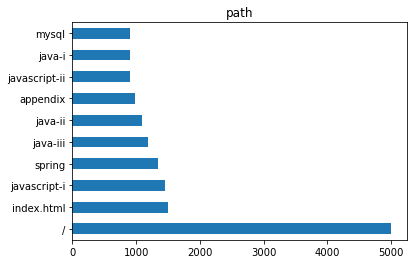

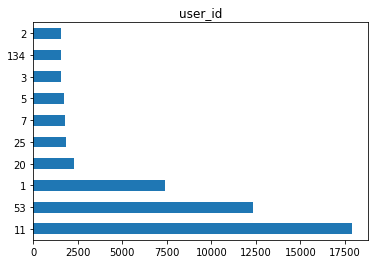

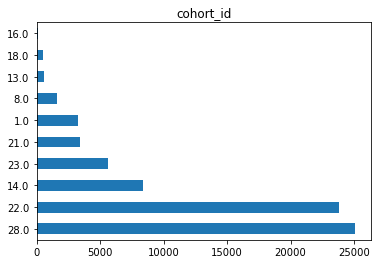

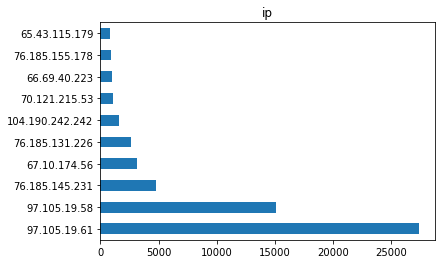

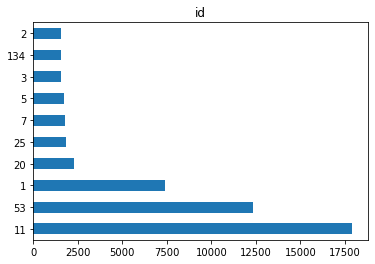

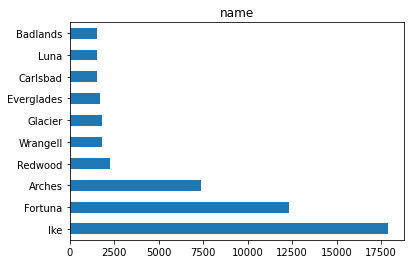

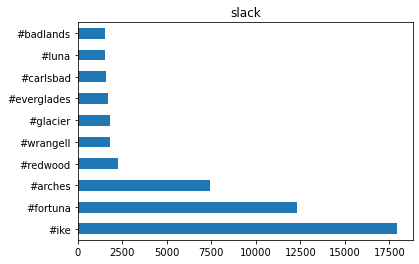

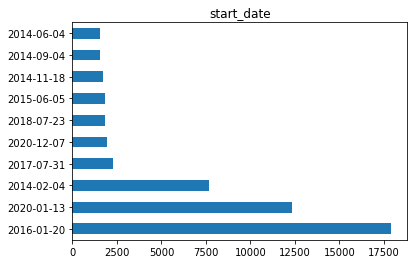

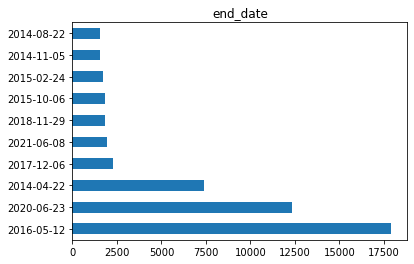

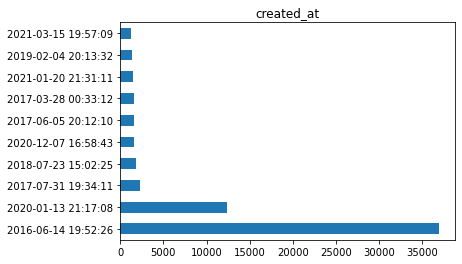

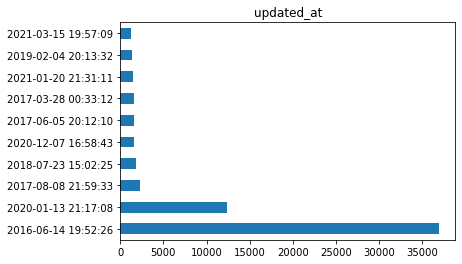

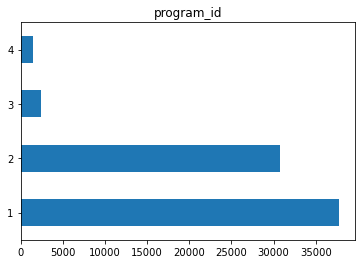

In [40]:
for col in df.columns:
    plt.figure()
    df[col].value_counts().sort_values(ascending = False).head(10).plot.barh(title = col)

In [ ]:
# 2. 

for these ip addresses with more than one start date any ip location other than 
97.105.19.61 which I determined was the Code up location may be anomalies, so let's look at just those other addresses